# Multiplicateur de Lagrange pour optimiser le budget marketing dépensé

Auteur : https://jooskorstanje.com/LagrangeMultiplier.html


Multiplicateur de Lagrange sur une fonction à 2 variables avec 1 contrainte d'égalité

Dans ce cahier, je montre comment utiliser le multiplicateur de Lagrange dans un cas relativement simple.

L'étude de cas :

    Supposons que nous ayons un budget fixe pour accélérer la commercialisation de 2500 dollars.
    Supposons que nous puissions choisir d'investir dans deux types de campagnes : les médias sociaux et la télévision, où vous devez décider
    Pour simplifier, disons qu'une campagne sur les réseaux sociaux coûte 25 dollars et qu'une campagne à la télévision coûte 250 dollars.
    Supposons que nous ayons beaucoup expérimenté dans le passé et que nous ayons pu définir les revenus en fonction des deux types d'investissements médias.

    Dans ce cahier, je montrerai comment trouver le revenu maximum et le nombre de différents types de campagnes que vous devriez acheter en utilisant le multiplicateur de Lagrange.



# Inspecting the costs

In [35]:
cost_social = 25
cost_tv = 250
budget = 2500

L'équation des coûts :
25 dollars fois le nombre de campagnes sociales + 250 fois le nombre de campagnes télévisées
Puisque nous voulons dépenser exactement le budget, nous savons que cela équivaut à 2500 dollars.

Sinon, la contrainte pour notre optimisation des revenus est : 25 social + 250 tv = 2500

In [36]:
#lets get the minimum and maximum number of campaigns:
social_min = 0
social_max = budget / cost_social

tv_min = 0
tv_max = budget / cost_tv

In [37]:
# if we fix the number of tv campaings, we know the number of social campaigns left to buy by inverting the formula
def n_social(n_tv, budget):
    return (budget - 250 * n_tv) / 25

In [38]:
# if we fix the number of social campaings, we know the number of tv campaigns left to buy by inverting the formula
def n_tv(n_social, budget):
    return (budget - 25 * n_social) / 250

Tracer les manières possibles de dépenser le budget sur un graphique

Chaque combinaison d'heures et de matériaux qui est sous la ligne est à l'intérieur du budget.
Chaque combinaison d'heures et de matériaux qui est au-dessus de la ligne est en dehors du budget.
Si nous voulons dépenser tout le budget (nous le faisons généralement), nous devons être exactement sur la ligne.

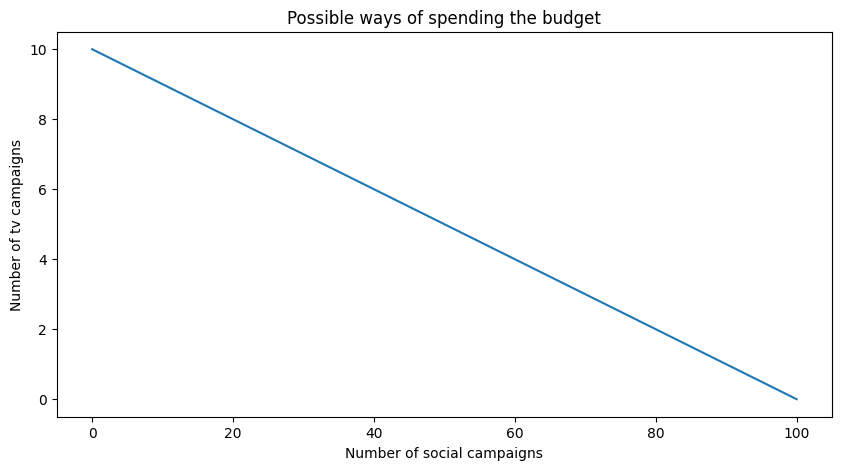

In [39]:
import numpy as np 
import matplotlib.pyplot as plt

social_x = np.linspace(social_min, social_max, 100)
tv_y = n_tv(social_x, budget)

plt.figure(figsize=(10,5))
plt.plot(social_x, tv_y)
plt.xlabel('Number of social campaigns')
plt.ylabel('Number of tv campaigns')
plt.title('Possible ways of spending the budget')
plt.show()

# Contrôler les revenus

Supposons que grâce à l'expérimentation et à l'analyse, quelqu'un ait pu identifier la courbe de revenus de votre entreprise et qu'elle soit définie comme :

Revenu = 7 fois le nombre de campagnes sociales à la puissance 3/4 fois le nombre de campagnes télévisées à la puissance 1/4.

Cela peut être présenté dans une fonction Python comme suit :

In [40]:
def revenues(social, tv):
    return social**(3/4) * tv**(1/4) * 7

La représentation 3D du problème

Dans notre exercice, nous avons trois variables : le chiffre d'affaires, le nombre de campagnes sociales et le nombre de campagnes télé sur les supports.
Bien sûr, nous voulons maximiser les revenus.

Nous avons également une contrainte budgétaire qui est la ligne 2D ci-dessus : le montant maximum que nous pouvons dépenser.
L'objectif est de trouver le revenu maximum tant qu'il est inférieur au budget.


Je vais d'abord montrer une représentation 3D du problème dans laquelle on voit :

    les revenus en 3D en fonction des campagnes sociales et des campagnes tv.
    la ligne de contrainte présentée en 2D sous le graphique des revenus.


Le but est d'identifier le point le plus haut de la courbe 3D qui se trouve exactement sur la ligne de contrainte.

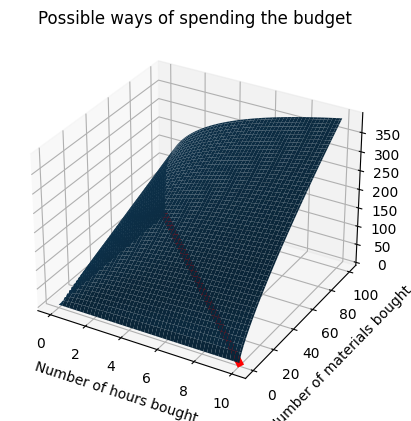

In [41]:
from mpl_toolkits.mplot3d import Axes3D
social_axis = np.linspace(social_min, social_max, 100)
tv_axis = np.linspace(tv_min, tv_max, 100)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(tv_grid, social_grid, revenues(social_grid, tv_grid))

ax.plot(tv_y, social_x, linewidth = 5, color = 'r')

ax.set_xlabel('Number of hours bought')
ax.set_ylabel('Number of materials bought')
ax.set_title('Possible ways of spending the budget')
plt.show()

# La représentation 2D du problème

La 3D est agréable à regarder, mais relativement difficile à lire. Par conséquent, j'ai créé deux graphiques 2D qui montrent exactement les mêmes informations : au lieu d'ajouter les revenus sur un axe Z, les revenus sont maintenant représentés sous forme de dégradé de couleur (à gauche) et de dégradé de contour (à droite).

L'objectif reste le même : trouver les revenus les plus élevés tant qu'ils sont inférieurs à la ligne de contrainte budgétaire.


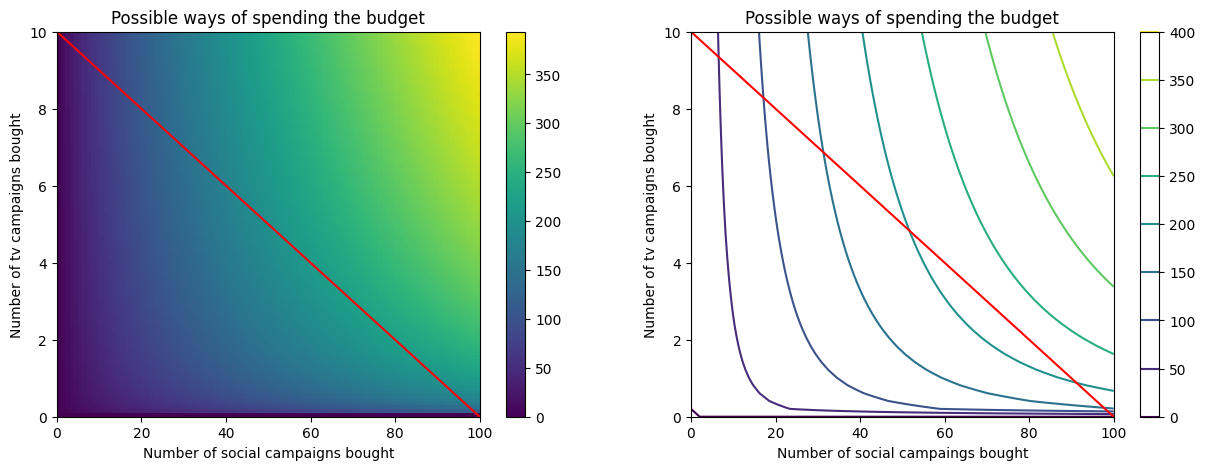

In [42]:
fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize = (15, 5))


social_axis = np.linspace(social_min, social_max, 100)
tv_axis = np.linspace(tv_max, tv_min, 100)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)
    
im = ax_l.imshow(revenues(social_grid, tv_grid), aspect = 'auto', extent=[social_min, social_max, tv_min, tv_max])
ax_l.plot(social_axis, n_tv(social_axis, 2500), 'r')
ax_l.set_xlabel('Number of social campaigns bought')
ax_l.set_ylabel('Number of tv campaigns bought')
ax_l.set_title('Possible ways of spending the budget')


# The contours are showing how the intersection looks like

social_axis = np.linspace(social_min, social_max)
tv_axis = np.linspace(tv_min, tv_max)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)

im2 = ax_r.contour(revenues(social_grid,tv_grid), extent=[social_min, social_max, tv_min, tv_max])
ax_r.plot(social_axis, n_tv(social_axis, 2500), 'r')
ax_r.set_xlabel('Number of social campaings bought')
ax_r.set_ylabel('Number of tv campaigns bought')
ax_r.set_title('Possible ways of spending the budget')

plt.colorbar(im,ax=ax_l)
plt.colorbar(im2,ax=ax_r)

plt.show()

# Solution visuelle

Si nous vérifions le graphique (que ce soit en dégradé ou en contour), nous pouvons lire que sur la ligne rouge (budget max), la valeur de revenu la plus élevée serait d'environ 3 campagnes télévisées et 70 campagnes sociales.

C'est super d'avoir cette première estimation visuelle, maintenant trouvons la valeur exacte avec les mathématiques.

Solution mathématique
Où est le maximum ?

Nous devons trouver le point où le contour des revenus est tangent à la ligne de contrainte.
La méthode que nous utilisons pour cela est le multiplicateur de Lagrange.

En bref, cela fonctionne comme suit:
Nous pouvons trouver le maximum au point où le gradient du contour Revenue est proportionnel au gradient de la ligne de contrainte.
Vous pouvez vérifier le graphique de contour pour voir si cela est vrai.

Comment représenter la proportionnalité ?

Il faut donc résoudre une proportionnalité plutôt qu'une égalité.
Donc pas : "gradient de revenus" = "gradient de contrainte"
Mais : "gradient de revenus" est proportionnel à "gradient de contrainte"
Nous le faisons mathématiquement en énonçant
"gradient de revenus" = lambda fois "gradient de contrainte"

Ce labda en fait un énoncé de proportionnalité.
Ce lambda est appelé multiplicateur de Lagrange.
Les dégradés sont des dérivés

Une étape délicate maintenant avant d'utiliser l'optimiseur python intégré consiste à obtenir les gradients en obtenant les dérivées de la fonction de revenu et de la fonction de contrainte. Puisqu'il y a deux variables dans chacune, nous avons besoin de deux dérivées partielles pour obtenir un vecteur de ces deux dérivées.

Pour les dérivés voir l'article sur Towards Data Science



In [43]:
from sympy import *

s, t, l = symbols('s t l')

solve([Eq((21/4)*((t**(1/4))/s**(1/4)) - 25*l, 0),
   Eq((7/4)*(s**(3/4)/t**(3/4)) - 250*l, 0),
   Eq(25*s+250*t - 2500, 0)], [s,t,l], simplify=False)

[(75.0000000000000, 2.50000000000000, 0.0897302713432092)]

# Conclusion:

Ayant:

    un budget de 2500
    un coût horaire de 25
    un coût unitaire matériel de 250
    une fonction de revenu spécifiée

En utilisant le Solveur Linéaire, nous avons identifié le maximum de Revenus qui sera obtenu à 75 campagnes sociales et 2,5 campagnes télévisées. Le revenu total serait de :

In [44]:
revenues(75, 2.5)

224.3256783580229